In [1]:
import os
import numpy
import random
import itertools
import pickle
import matplotlib.pyplot as plt
from matplotlib import cm

In [2]:
#### parameters
# result_path = '/Users/hojinjang/Desktop/DeepLearning/RobustFaceRecog/results/'
result_path = '/om2/user/jangh/DeepLearning/RobustFaceRecog/results/'
version = 4
model_formats = [
    #### blur
    'alexnet_scratch_blur_discrete_0-0.5-1-1.5-2-2.5-3-3.5-4_1_1_discrete_0',
    'alexnet_scratch_blur_discrete_0-0.5-1-1.5-2-2.5-3-3.5-4_100_1_discrete_0',
    'alexnet_scratch_blur_discrete_0-0.5-1-1.5-2-2.5-3-3.5-4_200_1_discrete_0',
    'alexnet_scratch_blur_discrete_0-0.5-1-1.5-2-2.5-3-3.5-4_300_1_discrete_0',
    'alexnet_scratch_blur_discrete_0-0.5-1-1.5-2-2.5-3-3.5-4_388_1_discrete_0',

    'vgg19_scratch_blur_discrete_0-0.5-1-1.5-2-2.5-3-3.5-4_1_1_discrete_0',
    'vgg19_scratch_blur_discrete_0-0.5-1-1.5-2-2.5-3-3.5-4_100_1_discrete_0',
    'vgg19_scratch_blur_discrete_0-0.5-1-1.5-2-2.5-3-3.5-4_200_1_discrete_0',
    'vgg19_scratch_blur_discrete_0-0.5-1-1.5-2-2.5-3-3.5-4_300_1_discrete_0',
    'vgg19_scratch_blur_discrete_0-0.5-1-1.5-2-2.5-3-3.5-4_388_1_discrete_0',

    'resnet50_scratch_blur_discrete_0-0.5-1-1.5-2-2.5-3-3.5-4_1_1_discrete_0',
    'resnet50_scratch_blur_discrete_0-0.5-1-1.5-2-2.5-3-3.5-4_100_1_discrete_0',
    'resnet50_scratch_blur_discrete_0-0.5-1-1.5-2-2.5-3-3.5-4_200_1_discrete_0',
    'resnet50_scratch_blur_discrete_0-0.5-1-1.5-2-2.5-3-3.5-4_300_1_discrete_0',
    'resnet50_scratch_blur_discrete_0-0.5-1-1.5-2-2.5-3-3.5-4_388_1_discrete_0',

    'vitb16_pretrained_blur_discrete_0-0.5-1-1.5-2-2.5-3-3.5-4_1_1_discrete_0',
    'vitb16_pretrained_blur_discrete_0-0.5-1-1.5-2-2.5-3-3.5-4_100_1_discrete_0',
    'vitb16_pretrained_blur_discrete_0-0.5-1-1.5-2-2.5-3-3.5-4_200_1_discrete_0',
    'vitb16_pretrained_blur_discrete_0-0.5-1-1.5-2-2.5-3-3.5-4_300_1_discrete_0',
    'vitb16_pretrained_blur_discrete_0-0.5-1-1.5-2-2.5-3-3.5-4_388_1_discrete_0',

    'cornets-1_scratch_blur_discrete_0-0.5-1-1.5-2-2.5-3-3.5-4_1_1_discrete_0',
    'cornets-1_scratch_blur_discrete_0-0.5-1-1.5-2-2.5-3-3.5-4_100_1_discrete_0',
    'cornets-1_scratch_blur_discrete_0-0.5-1-1.5-2-2.5-3-3.5-4_200_1_discrete_0',
    'cornets-1_scratch_blur_discrete_0-0.5-1-1.5-2-2.5-3-3.5-4_300_1_discrete_0',
    'cornets-1_scratch_blur_discrete_0-0.5-1-1.5-2-2.5-3-3.5-4_388_1_discrete_0',

    'blnet-1_scratch_blur_discrete_0-0.5-1-1.5-2-2.5-3-3.5-4_1_1_discrete_0',
    'blnet-1_scratch_blur_discrete_0-0.5-1-1.5-2-2.5-3-3.5-4_100_1_discrete_0',
    'blnet-1_scratch_blur_discrete_0-0.5-1-1.5-2-2.5-3-3.5-4_200_1_discrete_0',
    'blnet-1_scratch_blur_discrete_0-0.5-1-1.5-2-2.5-3-3.5-4_300_1_discrete_0',
    'blnet-1_scratch_blur_discrete_0-0.5-1-1.5-2-2.5-3-3.5-4_388_1_discrete_0',

    'convlstm3-1_scratch_blur_discrete_0-0.5-1-1.5-2-2.5-3-3.5-4_1_1_discrete_0',
    'convlstm3-1_scratch_blur_discrete_0-0.5-1-1.5-2-2.5-3-3.5-4_100_1_discrete_0',
    'convlstm3-1_scratch_blur_discrete_0-0.5-1-1.5-2-2.5-3-3.5-4_200_1_discrete_0',
    'convlstm3-1_scratch_blur_discrete_0-0.5-1-1.5-2-2.5-3-3.5-4_300_1_discrete_0',
    'convlstm3-1_scratch_blur_discrete_0-0.5-1-1.5-2-2.5-3-3.5-4_388_1_discrete_0',
    
    'cornets-3_scratch_blur_discrete_0-0.5-1-1.5-2-2.5-3-3.5-4_1_1_discrete_0',
    'cornets-3_scratch_blur_discrete_0-0.5-1-1.5-2-2.5-3-3.5-4_100_1_discrete_0',
    'cornets-3_scratch_blur_discrete_0-0.5-1-1.5-2-2.5-3-3.5-4_200_1_discrete_0',
    'cornets-3_scratch_blur_discrete_0-0.5-1-1.5-2-2.5-3-3.5-4_300_1_discrete_0',
    'cornets-3_scratch_blur_discrete_0-0.5-1-1.5-2-2.5-3-3.5-4_388_1_discrete_0',

    'blnet-3_scratch_blur_discrete_0-0.5-1-1.5-2-2.5-3-3.5-4_1_1_discrete_0',
    'blnet-3_scratch_blur_discrete_0-0.5-1-1.5-2-2.5-3-3.5-4_100_1_discrete_0',
    'blnet-3_scratch_blur_discrete_0-0.5-1-1.5-2-2.5-3-3.5-4_200_1_discrete_0',
    'blnet-3_scratch_blur_discrete_0-0.5-1-1.5-2-2.5-3-3.5-4_300_1_discrete_0',
    'blnet-3_scratch_blur_discrete_0-0.5-1-1.5-2-2.5-3-3.5-4_388_1_discrete_0',

    'convlstm3-3_scratch_blur_discrete_0-0.5-1-1.5-2-2.5-3-3.5-4_1_1_discrete_0',
    'convlstm3-3_scratch_blur_discrete_0-0.5-1-1.5-2-2.5-3-3.5-4_100_1_discrete_0',
    'convlstm3-3_scratch_blur_discrete_0-0.5-1-1.5-2-2.5-3-3.5-4_200_1_discrete_0',
    'convlstm3-3_scratch_blur_discrete_0-0.5-1-1.5-2-2.5-3-3.5-4_300_1_discrete_0',
    'convlstm3-3_scratch_blur_discrete_0-0.5-1-1.5-2-2.5-3-3.5-4_388_1_discrete_0',

    'cornets-5_scratch_blur_discrete_0-0.5-1-1.5-2-2.5-3-3.5-4_1_1_discrete_0',
    'cornets-5_scratch_blur_discrete_0-0.5-1-1.5-2-2.5-3-3.5-4_100_1_discrete_0',
    'cornets-5_scratch_blur_discrete_0-0.5-1-1.5-2-2.5-3-3.5-4_200_1_discrete_0',
    'cornets-5_scratch_blur_discrete_0-0.5-1-1.5-2-2.5-3-3.5-4_300_1_discrete_0',
    'cornets-5_scratch_blur_discrete_0-0.5-1-1.5-2-2.5-3-3.5-4_388_1_discrete_0',

    'blnet-5_scratch_blur_discrete_0-0.5-1-1.5-2-2.5-3-3.5-4_1_1_discrete_0',
    'blnet-5_scratch_blur_discrete_0-0.5-1-1.5-2-2.5-3-3.5-4_100_1_discrete_0',
    'blnet-5_scratch_blur_discrete_0-0.5-1-1.5-2-2.5-3-3.5-4_200_1_discrete_0',
    'blnet-5_scratch_blur_discrete_0-0.5-1-1.5-2-2.5-3-3.5-4_300_1_discrete_0',
    'blnet-5_scratch_blur_discrete_0-0.5-1-1.5-2-2.5-3-3.5-4_388_1_discrete_0',

    'convlstm3-5_scratch_blur_discrete_0-0.5-1-1.5-2-2.5-3-3.5-4_1_1_discrete_0',
    'convlstm3-5_scratch_blur_discrete_0-0.5-1-1.5-2-2.5-3-3.5-4_100_1_discrete_0',
    'convlstm3-5_scratch_blur_discrete_0-0.5-1-1.5-2-2.5-3-3.5-4_200_1_discrete_0',
    'convlstm3-5_scratch_blur_discrete_0-0.5-1-1.5-2-2.5-3-3.5-4_300_1_discrete_0',
    'convlstm3-5_scratch_blur_discrete_0-0.5-1-1.5-2-2.5-3-3.5-4_388_1_discrete_0',
]
file_name = 'analysis_v4_accuracy_by_blur.pickle'

num_categories = 388
category_orders = [i for i in range(num_categories)]
num_categories_transformed = [1, 100, 200, 300, 388]

In [3]:
params = [0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4] # blur
acc_within = numpy.zeros((len(model_formats), len(params)))
acc_across = numpy.zeros((len(model_formats), len(params)))

for i, model_format in enumerate(model_formats):
    mf = model_format.split('_')

    model_name = mf[0]
    pretrained = True if mf[1] == 'pretrained' else (False if mf[1] == 'scratch' else None)
    transformation_type = mf[2]
    transformation_sampling = mf[3]
    transformation_levels = list(map(float, mf[4].split('-')))
    # num_categories_transformed = int(params[5])
    trial = int(mf[6])
    if len(mf) > 7:
        background_sampling = mf[7]
        background_colors = list(map(float, mf[8].split('-')))

    random.seed(trial) # seed fixed
    random.shuffle(category_orders)

    with open(os.path.join(result_path, 'v{}'.format(version), model_format, file_name), 'rb') as f:
        data = pickle.load(f)
    acc_within[i,:] = data['accuracy1_within']
    acc_across[i,:] = data['accuracy1_across']

Text(0.5, 1.0, 'ConvLSTM3 (t=5)')

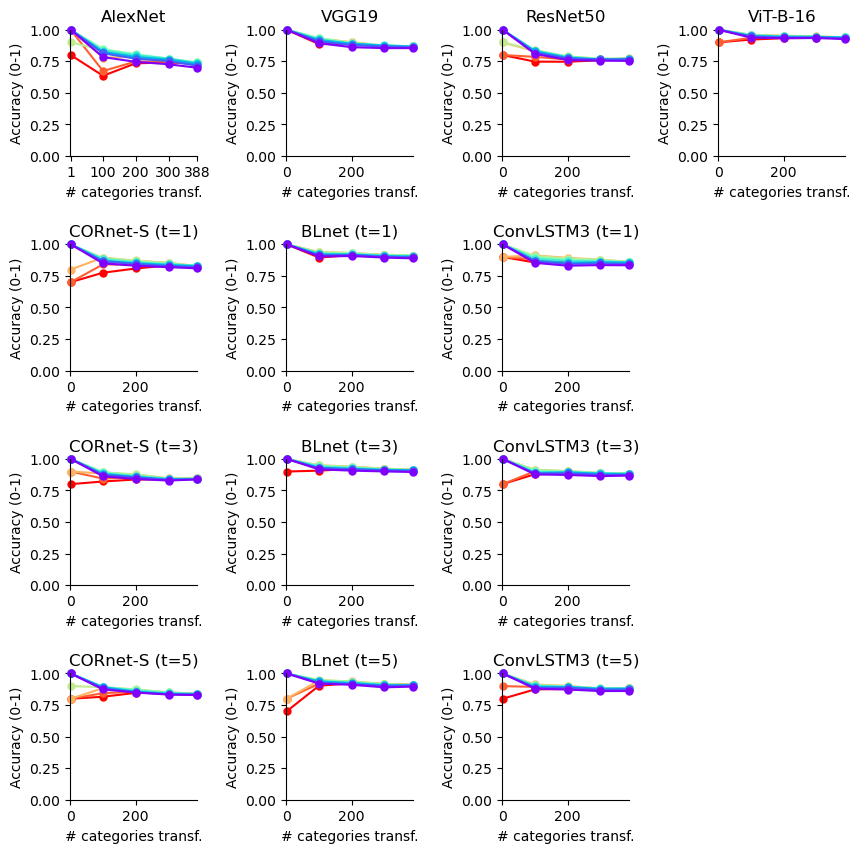

In [13]:
plt.figure(figsize=(10,10))
plt.rcParams['font.size'] = '10'
plt.rcParams["axes.spines.right"] = False
plt.rcParams["axes.spines.top"] = False
colors = cm.rainbow(numpy.linspace(1, 0, len(params)))
margin = 0.7

#### visualize (ind)
plt.subplot(4,4, 1)
plt.subplots_adjust(wspace=margin, hspace=margin)
for i in range(len(params)):
    plt.plot(num_categories_transformed, acc_within[0:5,i], '.-', markersize=10, color=colors[i], clip_on=False)
plt.xlabel('# categories transf.')
plt.ylabel('Accuracy (0-1)')
plt.xticks(num_categories_transformed)
plt.xlim([0,388])
plt.ylim(0,1)
plt.title('AlexNet')

plt.subplot(4,4, 2)
plt.subplots_adjust(wspace=margin, hspace=margin)
for i in range(len(params)):
    plt.plot(num_categories_transformed, acc_within[5:10,i], '.-', markersize=10, color=colors[i], clip_on=False)
plt.xlabel('# categories transf.')
plt.ylabel('Accuracy (0-1)')
plt.xticks(num_categories_transformed)
plt.xlim([0,388])
plt.ylim(0,1)
plt.title('VGG19')

plt.subplot(4,4, 3)
plt.subplots_adjust(wspace=margin, hspace=margin)
for i in range(len(params)):
    plt.plot(num_categories_transformed, acc_within[10:15,i], '.-', markersize=10, color=colors[i], clip_on=False)
plt.xlabel('# categories transf.')
plt.ylabel('Accuracy (0-1)')
plt.xticks(num_categories_transformed)
plt.xlim([0,388])
plt.ylim(0,1)
plt.title('ResNet50')

plt.subplot(4,4, 4)
plt.subplots_adjust(wspace=margin, hspace=margin)
for i in range(len(params)):
    plt.plot(num_categories_transformed, acc_within[15:20,i], '.-', markersize=10, color=colors[i], clip_on=False)
plt.xlabel('# categories transf.')
plt.ylabel('Accuracy (0-1)')
plt.xticks(num_categories_transformed)
plt.xlim([0,388])
plt.ylim(0,1)
plt.title('ViT-B-16')

plt.subplot(4,4, 5)
plt.subplots_adjust(wspace=margin, hspace=margin)
for i in range(len(params)):
    plt.plot(num_categories_transformed, acc_within[20:25,i], '.-', markersize=10, color=colors[i], clip_on=False)
plt.xlabel('# categories transf.')
plt.ylabel('Accuracy (0-1)')
plt.xticks(num_categories_transformed)
plt.xlim([0,388])
plt.ylim(0,1)
plt.title('CORnet-S (t=1)')

plt.subplot(4,4, 6)
plt.subplots_adjust(wspace=margin, hspace=margin)
for i in range(len(params)):
    plt.plot(num_categories_transformed, acc_within[25:30,i], '.-', markersize=10, color=colors[i], clip_on=False)
plt.xlabel('# categories transf.')
plt.ylabel('Accuracy (0-1)')
plt.xticks(num_categories_transformed)
plt.xlim([0,388])
plt.ylim(0,1)
plt.title('BLnet (t=1)')

plt.subplot(4,4, 7)
plt.subplots_adjust(wspace=margin, hspace=margin)
for i in range(len(params)):
    plt.plot(num_categories_transformed, acc_within[30:35,i], '.-', markersize=10, color=colors[i], clip_on=False)
plt.xlabel('# categories transf.')
plt.ylabel('Accuracy (0-1)')
plt.xticks(num_categories_transformed)
plt.xlim([0,388])
plt.ylim(0,1)
plt.title('ConvLSTM3 (t=1)')

plt.subplot(4,4, 9)
plt.subplots_adjust(wspace=margin, hspace=margin)
for i in range(len(params)):
    plt.plot(num_categories_transformed, acc_within[35:40,i], '.-', markersize=10, color=colors[i], clip_on=False)
plt.xlabel('# categories transf.')
plt.ylabel('Accuracy (0-1)')
plt.xticks(num_categories_transformed)
plt.xlim([0,388])
plt.ylim(0,1)
plt.title('CORnet-S (t=3)')

plt.subplot(4,4, 10)
plt.subplots_adjust(wspace=margin, hspace=margin)
for i in range(len(params)):
    plt.plot(num_categories_transformed, acc_within[40:45,i], '.-', markersize=10, color=colors[i], clip_on=False)
plt.xlabel('# categories transf.')
plt.ylabel('Accuracy (0-1)')
plt.xticks(num_categories_transformed)
plt.xlim([0,388])
plt.ylim(0,1)
plt.title('BLnet (t=3)')

plt.subplot(4,4, 11)
plt.subplots_adjust(wspace=margin, hspace=margin)
for i in range(len(params)):
    plt.plot(num_categories_transformed, acc_within[45:50,i], '.-', markersize=10, color=colors[i], clip_on=False)
plt.xlabel('# categories transf.')
plt.ylabel('Accuracy (0-1)')
plt.xticks(num_categories_transformed)
plt.xlim([0,388])
plt.ylim(0,1)
plt.title('ConvLSTM3 (t=3)')

plt.subplot(4,4, 13)
plt.subplots_adjust(wspace=margin, hspace=margin)
for i in range(len(params)):
    plt.plot(num_categories_transformed, acc_within[50:55,i], '.-', markersize=10, color=colors[i], clip_on=False)
plt.xlabel('# categories transf.')
plt.xticks(num_categories_transformed)
plt.ylabel('Accuracy (0-1)')
plt.xlim([0,388])
plt.ylim(0,1)
plt.title('CORnet-S (t=5)')

plt.subplot(4,4, 14)
plt.subplots_adjust(wspace=margin, hspace=margin)
for i in range(len(params)):
    plt.plot(num_categories_transformed, acc_within[55:60,i], '.-', markersize=10, color=colors[i], clip_on=False)
plt.xlabel('# categories transf.')
plt.xticks(num_categories_transformed)
plt.ylabel('Accuracy (0-1)')
plt.xlim([0,388])
plt.ylim(0,1)
plt.title('BLnet (t=5)')

plt.subplot(4,4, 15)
plt.subplots_adjust(wspace=margin, hspace=margin)
for i in range(len(params)):
    plt.plot(num_categories_transformed, acc_within[60:65,i], '.-', markersize=10, color=colors[i], clip_on=False)
plt.xlabel('# categories transf.')
plt.xticks(num_categories_transformed)
plt.ylabel('Accuracy (0-1)')
plt.xlim([0,388])
plt.ylim(0,1)
plt.title('ConvLSTM3 (t=5)')


Text(0.5, 1.0, 'ConvLSTM3 (t=5)')

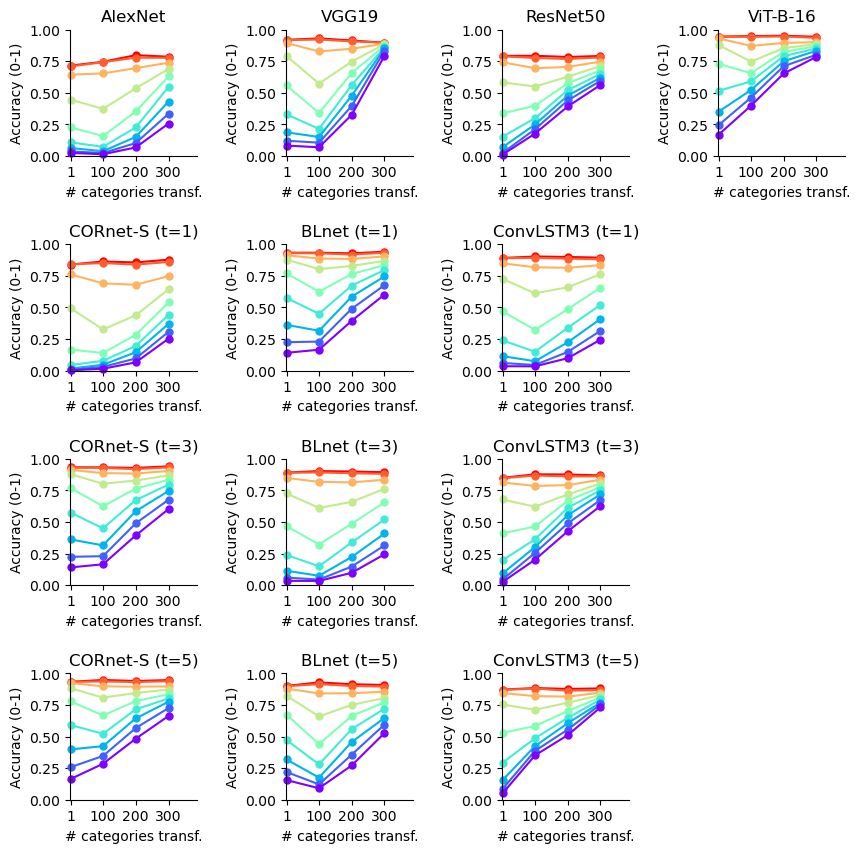

In [15]:
plt.figure(figsize=(10,10))
plt.rcParams['font.size'] = '10'
plt.rcParams["axes.spines.right"] = False
plt.rcParams["axes.spines.top"] = False
colors = cm.rainbow(numpy.linspace(1, 0, len(params)))
margin = 0.7

#### visualize (ood)

plt.subplot(4,4, 1)
plt.subplots_adjust(wspace=margin, hspace=margin)
for i in range(len(params)):
    plt.plot(num_categories_transformed[:-1], acc_across[0:5-1,i], '.-', markersize=10, color=colors[i], clip_on=False)
plt.xlabel('# categories transf.')
plt.ylabel('Accuracy (0-1)')
plt.xticks(num_categories_transformed[:-1])
plt.xlim([0,388])
plt.ylim(0,1)
plt.title('AlexNet')

plt.subplot(4,4, 2)
plt.subplots_adjust(wspace=margin, hspace=margin)
for i in range(len(params)):
    plt.plot(num_categories_transformed[:-1], acc_across[5:10-1,i], '.-', markersize=10, color=colors[i], clip_on=False)
plt.xlabel('# categories transf.')
plt.ylabel('Accuracy (0-1)')
plt.xticks(num_categories_transformed[:-1])
plt.xlim([0,388])
plt.ylim(0,1)
plt.title('VGG19')

plt.subplot(4,4, 3)
plt.subplots_adjust(wspace=margin, hspace=margin)
for i in range(len(params)):
    plt.plot(num_categories_transformed[:-1], acc_across[10:15-1,i], '.-', markersize=10, color=colors[i], clip_on=False)
plt.xlabel('# categories transf.')
plt.ylabel('Accuracy (0-1)')
plt.xticks(num_categories_transformed[:-1])
plt.xlim([0,388])
plt.ylim(0,1)
plt.title('ResNet50')

plt.subplot(4,4, 4)
plt.subplots_adjust(wspace=margin, hspace=margin)
for i in range(len(params)):
    plt.plot(num_categories_transformed[:-1], acc_across[15:20-1,i], '.-', markersize=10, color=colors[i], clip_on=False)
plt.xlabel('# categories transf.')
plt.ylabel('Accuracy (0-1)')
plt.xticks(num_categories_transformed[:-1])
plt.xlim([0,388])
plt.ylim(0,1)
plt.title('ViT-B-16')

plt.subplot(4,4, 5)
plt.subplots_adjust(wspace=margin, hspace=margin)
for i in range(len(params)):
    plt.plot(num_categories_transformed[:-1], acc_across[20:25-1,i], '.-', markersize=10, color=colors[i], clip_on=False)
plt.xlabel('# categories transf.')
plt.ylabel('Accuracy (0-1)')
plt.xticks(num_categories_transformed[:-1])
plt.xlim([0,388])
plt.ylim(0,1)
plt.title('CORnet-S (t=1)')

plt.subplot(4,4, 6)
plt.subplots_adjust(wspace=margin, hspace=margin)
for i in range(len(params)):
    plt.plot(num_categories_transformed[:-1], acc_across[25:30-1,i], '.-', markersize=10, color=colors[i], clip_on=False)
plt.xlabel('# categories transf.')
plt.ylabel('Accuracy (0-1)')
plt.xticks(num_categories_transformed[:-1])
plt.xlim([0,388])
plt.ylim(0,1)
plt.title('BLnet (t=1)')

plt.subplot(4,4, 7)
plt.subplots_adjust(wspace=margin, hspace=margin)
for i in range(len(params)):
    plt.plot(num_categories_transformed[:-1], acc_across[30:35-1,i], '.-', markersize=10, color=colors[i], clip_on=False)
plt.xlabel('# categories transf.')
plt.ylabel('Accuracy (0-1)')
plt.xticks(num_categories_transformed[:-1])
plt.xlim([0,388])
plt.ylim(0,1)
plt.title('ConvLSTM3 (t=1)')

plt.subplot(4,4, 9)
plt.subplots_adjust(wspace=margin, hspace=margin)
for i in range(len(params)):
    plt.plot(num_categories_transformed[:-1], acc_across[25:30-1,i], '.-', markersize=10, color=colors[i], clip_on=False)
plt.xlabel('# categories transf.')
plt.ylabel('Accuracy (0-1)')
plt.xticks(num_categories_transformed[:-1])
plt.xlim([0,388])
plt.ylim(0,1)
plt.title('CORnet-S (t=3)')

plt.subplot(4,4, 10)
plt.subplots_adjust(wspace=margin, hspace=margin)
for i in range(len(params)):
    plt.plot(num_categories_transformed[:-1], acc_across[30:35-1,i], '.-', markersize=10, color=colors[i], clip_on=False)
plt.xlabel('# categories transf.')
plt.ylabel('Accuracy (0-1)')
plt.xticks(num_categories_transformed[:-1])
plt.xlim([0,388])
plt.ylim(0,1)
plt.title('BLnet (t=3)')

plt.subplot(4,4, 11)
plt.subplots_adjust(wspace=margin, hspace=margin)
for i in range(len(params)):
    plt.plot(num_categories_transformed[:-1], acc_across[35:40-1,i], '.-', markersize=10, color=colors[i], clip_on=False)
plt.xlabel('# categories transf.')
plt.ylabel('Accuracy (0-1)')
plt.xticks(num_categories_transformed[:-1])
plt.xlim([0,388])
plt.ylim(0,1)
plt.title('ConvLSTM3 (t=3)')

plt.subplot(4,4, 13)
plt.subplots_adjust(wspace=margin, hspace=margin)
for i in range(len(params)):
    plt.plot(num_categories_transformed[:-1], acc_across[40:45-1,i], '.-', markersize=10, color=colors[i], clip_on=False)
plt.xlabel('# categories transf.')
plt.ylabel('Accuracy (0-1)')
plt.xticks(num_categories_transformed[:-1])
plt.xlim([0,388])
plt.ylim(0,1)
plt.title('CORnet-S (t=5)')

plt.subplot(4,4, 14)
plt.subplots_adjust(wspace=margin, hspace=margin)
for i in range(len(params)):
    plt.plot(num_categories_transformed[:-1], acc_across[45:50-1,i], '.-', markersize=10, color=colors[i], clip_on=False)
plt.xlabel('# categories transf.')
plt.ylabel('Accuracy (0-1)')
plt.xticks(num_categories_transformed[:-1])
plt.xlim([0,388])
plt.ylim(0,1)
plt.title('BLnet (t=5)')

plt.subplot(4,4, 15)
plt.subplots_adjust(wspace=margin, hspace=margin)
for i in range(len(params)):
    plt.plot(num_categories_transformed[:-1], acc_across[50:55-1,i], '.-', markersize=10, color=colors[i], clip_on=False)
plt.xlabel('# categories transf.')
plt.ylabel('Accuracy (0-1)')
plt.xticks(num_categories_transformed[:-1])
plt.xlim([0,388])
plt.ylim(0,1)
plt.title('ConvLSTM3 (t=5)')
